In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit

In [2]:
def twi_minus_loglikelihood(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata09 = pd.read_csv("perlist09.csv")
    f = perdata09['f']
    per = perdata09['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata09)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
bnds=(0.001,0.1),(1.0E-5,1.0E-3),(1.5,5.0),(0,2)
minimizer_kwargs = {"bounds":(bnds)}
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
m = minimize(twi_minus_loglikelihood,x0_array,method = 'TNC',bounds=bnds)

# m = basinhopping(twi_minus_loglikelihood,x0_array,minimizer_kwargs=minimizer_kwargs)

6677.512027375579
6677.512027375579
6677.511626508644
6677.498775163366
6677.512028091875
6677.511987187849
6677.511811251147
6677.511811251147
6677.511410384395
6677.498559043085
6677.511811967438
6677.511771063411
5999.284400589282
5999.284400589282
5999.284463118728
5999.298589576411
5999.284399641977
5999.284404602896
5744.217912564769
5744.217912564769
5744.2179683663635
5744.2273364765815
5744.217912188951
5744.217910441531
5744.217909197754
5744.217909197754
5744.21796499937
5744.2273331095175
5744.217908821939
5744.21790707453
5744.217906229792
5744.217906229792
5744.217962031399
5744.227330141484
5744.217905853974
5744.217904106577
5727.197686197119
5727.197686197119
5727.197736376823
5727.206713228816
5727.197685852719
5727.197684123504
5666.925110909169
5666.925110909169
5666.9251152776205
5666.927437659275
5666.925110920063
5666.925108991938
7562.992241813184
7562.992241813184
7562.991267381198
7560.325383717393
7562.992255836091
7562.992232266281
5794.743169117237
5794.743

5655.986398349303
5650.4686412444225
5650.4686412444225
5650.468636647139
5650.4670622791045
5650.468641423817
5650.46864109554
5650.245985748595
5650.245985748595
5650.245986291933
5650.246783071561
5650.245985829604
5650.245985647066
5650.178723259522
5650.178723259522
5650.178721275488
5650.178390585913
5650.178723388283
5650.178723135257
5650.178723234897
5650.178723234897
5650.178721250868
5650.178390561291
5650.178723363656
5650.178723110628
5650.1787232587185
5650.1787232587185
5650.178721274671
5650.178390585121
5650.1787233874675
5650.178723134436
5650.17781388638
5650.17781388638
5650.177811902452
5650.177481505275
5650.17781401513
5650.177813762078
5650.1732685016295
5650.1732685016295
5650.173266518168
5650.172937583611
5650.173268630264
5650.173268377117
5650.060442913384
5650.060442913384
5650.0604409429225
5650.060148924222
5650.060443039761
5650.060442783932
5677.6944364536985
5677.6944364536985
5677.694462842235
5677.706931236296
5677.694435049746
5677.694436341939
564

In [4]:
print(m)

     fun: 5646.3690052793745
     jac: array([-3.57783301e+02,  1.00099893e+05, -5.42959242e+00, -7.59810064e+00])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 18
  status: 3
 success: False
       x: array([2.04215825e-02, 7.00568142e-05, 2.85413064e+00, 1.53400581e+00])


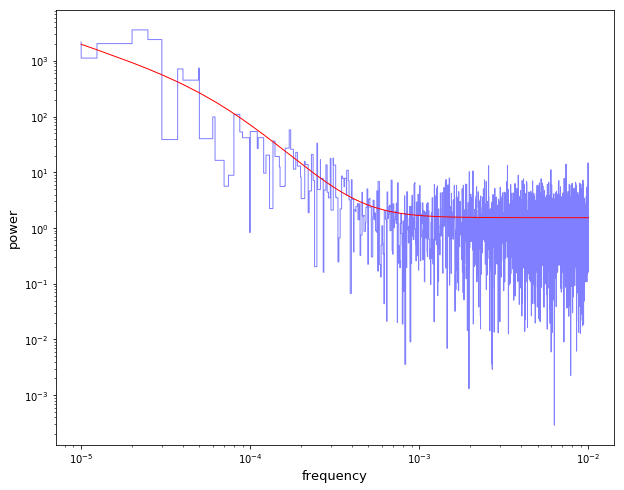

In [5]:
perdata09 = pd.read_csv("perlist09.csv")
f = perdata09['f']
per = perdata09['per']

alpha_L = 1.0
parameter = m.x
A,f_b,alpha_H,poisson = parameter

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [6]:
# 10^-4 之前的PSD波动很大，考虑 单独对 10^-4 以上频率的PSD进行拟合

def twi_minus_loglikelihood_bigf(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata09 = pd.read_csv("perlist09.csv")
    f = perdata09['f']
    per = perdata09['per']
    
    f2=[]
    per2=[]
    model2 = []
    
    f_length = len(f)
    for i in range(f_length):
        if f[i]>=1.0E-4:
            f2.append(f[i])
            per2.append(per[i])
            model2.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
    length = len(per2)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per2[i]/model2[i]+math.log(model2[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [7]:
bnds=(0.001,0.1),(1.0E-4,1.0E-3),(2.0,5.0),(0,2)
minimizer_kwargs = {"bounds":(bnds)}
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
m = minimize(twi_minus_loglikelihood_bigf,x0_array,method = 'TNC',bounds=bnds)

# m = basinhopping(twi_minus_loglikelihood,x0_array,minimizer_kwargs=minimizer_kwargs)

6372.854254918966
6372.854254918966
6372.854075613955
6372.841171905825
6372.854255650794
6372.854214737725
6372.854051686302
6372.854051686302
6372.853872381345
6372.840968676162
6372.854052418145
6372.85401150506
5621.8714833872355
5621.8714833872355
5621.8715587863235
5621.881353330722
5621.871482838541
5621.871487373472
5447.138597250855
5447.138597250855
5447.13865279597
5447.143704175215
5447.138597091364
5447.138594939739
5447.138595183446
5447.138595183446
5447.13865072856
5447.143702107676
5447.138595023953
5447.138592872327
5427.502627654586
5427.502627654586
5427.502517782786
5427.495347917329
5427.502627904129
5427.502626409142
5415.525943488023
5415.525943488023
5415.525962355127
5415.526720849748
5415.525943497714
5415.525941837624
5413.240932213557
5413.240932213557
5413.2409085766285
5413.238292747677
5413.240932335481
5413.240930814364
5413.240932039009
5413.240932039009
5413.240908402066
5413.238292573192
5413.240932160903
5413.240930639808
5413.240485066993
5413.2404

5403.4540134444505
5403.454008430613
5403.454016123697
5403.454016332236
5403.454016150177
5403.454016150177
5403.454013444365
5403.454008430514
5403.454016123588
5403.454016332142
5403.449995351486
5403.449995351486
5403.449992864144
5403.449987707458
5403.449995325094
5403.449995532585
5403.434224831224
5403.434224831224
5403.434223326262
5403.434215898401
5403.434224805937
5403.434225007991
5405.433146534523
5405.433146534523
5405.433132882389
5405.431795552924
5405.433146585689
5405.433146538045
5403.750462557126
5403.750462557126
5403.75046166416
5403.750158051553
5403.750462555609
5403.7504626632135
5403.477171833302
5403.477171833302
5403.477172936015
5403.47708591661
5403.477171817251
5403.477171978494
5403.427120942905
5403.427120942905
5403.427121434908
5403.427089131395
5403.427120921671
5403.427121104828
5403.423100547215
5403.423100547215
5403.423100232297
5403.423083855359
5403.4231005238325
5403.423100716796
5403.423100547176
5403.423100547176
5403.423100232262
5403.4230

In [8]:
print(m)

     fun: 5403.4227576034145
     jac: array([  20.67044989, -101.82366168,   -2.39315341,   17.06930561])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 15
  status: 3
 success: False
       x: array([3.95110766e-03, 2.43851639e-04, 3.77674145e+00, 1.55973520e+00])


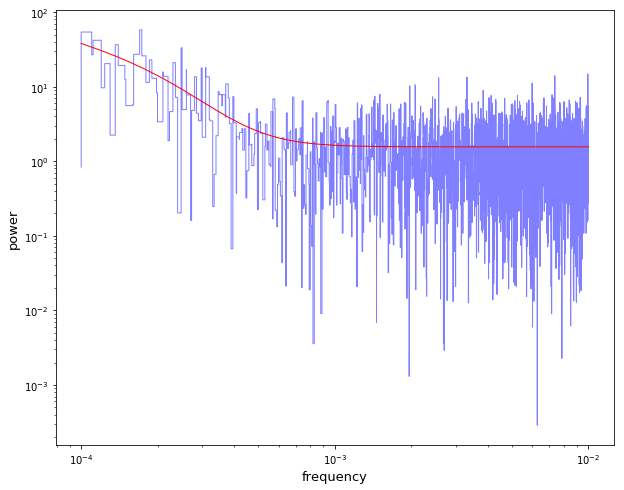

In [9]:
alpha_L = 1.0
parameter = m.x
A,f_b,alpha_H,poisson = parameter

f2=[]
per2=[]
model2 = []
f_length = len(f)
for i in range(f_length):
    if f[i]>=1.0E-4:
        f2.append(f[i])
        per2.append(per[i])
        model2.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f2, per2, color="b", alpha=0.5, linewidth=1)
plt.plot(f2, model2, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [10]:
def twi_minus_loglikelihood_nobreak(parameter):
    A,alpha,poisson = parameter
    alpha_L = 1.0
    
    perdata09 = pd.read_csv("perlist09.csv")
    f = perdata09['f']
    per = perdata09['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*A+poisson)
     
    
    length = len(perdata09)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [15]:
bnds=(0.0000001,0.1),(1.0,5.0),(0,2)
minimizer_kwargs = {"bounds":(bnds)}
x1=[1.0E-5,2.0,1.0]
x1_array=np.array(x1)
n = minimize(twi_minus_loglikelihood_nobreak,x1_array,method = 'L-BFGS-B', bounds=bnds)

6549.851496616245
6549.851496616245
6550.416701308006
6549.851538583212
6549.851493632859
6549.720173193328
6549.720173193328
6550.285421383979
6549.720215154858
6549.72017020878
6285.425990140278
6285.425990140278
6247.168414585126
6285.425952080133
6285.42597091479
6241.629678736861
6241.629678736861
6242.323718083102
6241.629706898834
6241.629672354598
6057.803070969021
6057.803070969021
6058.593283296983
6057.80308876063
6057.803061497775
5961.123309142326
5961.123309142326
5961.837804658694
5961.123318508179
5961.12329708842
5930.555422328792
5930.555422328792
5930.612931503278
5930.55542385232
5930.555408232946
5930.555422180859
5930.555422180859
5930.612931281523
5930.555423704391
5930.555408084995
5930.525943754325
5930.525943754325
5930.49029298351
5930.525944688644
5930.525929528229
5930.503697338415
5930.503697338415
5930.516254146055
5930.5036985714405
5930.50368317796
5930.505244374447
5930.505244374447
5930.494122189541
5930.505245459168
5930.505230181314
5930.50211916358

In [16]:
print (n)

# L-BFGS-B  3422.1714304329125
# TNC       3654.471250218961

     fun: 5930.50211916358
     jac: array([82119.85568778,   115.91309885, -1417.67723107])
 message: 'Linear search failed'
    nfev: 37
     nit: 2
  status: 4
 success: False
       x: array([6.99211851e-07, 2.00001368e+00, 1.00001858e+00])


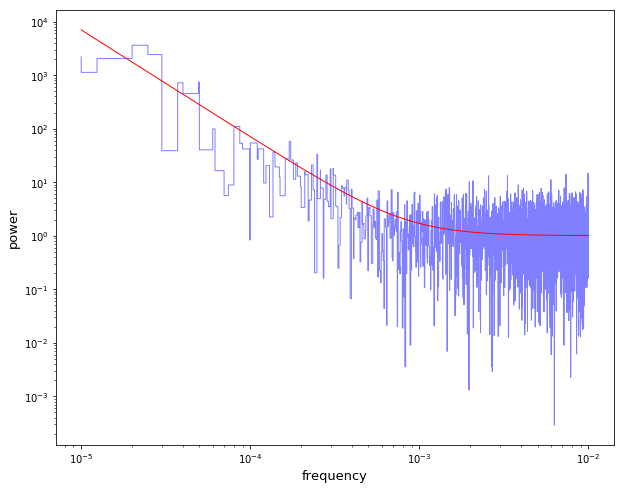

In [17]:
parameter2 = n.x
A,alpha,poisson = parameter2

model2 = []
f_length = len(f)
for i in range(f_length):
    model2.append((f[i]**(-alpha))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model2, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()